# Multiple Linear Regression

##  Bike Sharing Assignement 

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes
How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
#Read the data
bike_sharing = pd.read_csv('day.csv')

In [4]:
#look into the data
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#look at the shape of the dataset
bike_sharing.shape

(730, 16)

In [6]:
#instant has only index for the rows, hence dropped instant column & dteday is combination of date,
#month and year, in the provided dataset we do have seperate column, hence dropping dteday column.
bike_sharing = bike_sharing.drop(['instant','dteday'], axis=1)

In [7]:
#look into min, mean and max of numberic variables
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Check for null values in columns
bike_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# As recommended trasforming the season, month, weekday, weather columns to string values (for better readibility)

bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing.mnth = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})

In [10]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

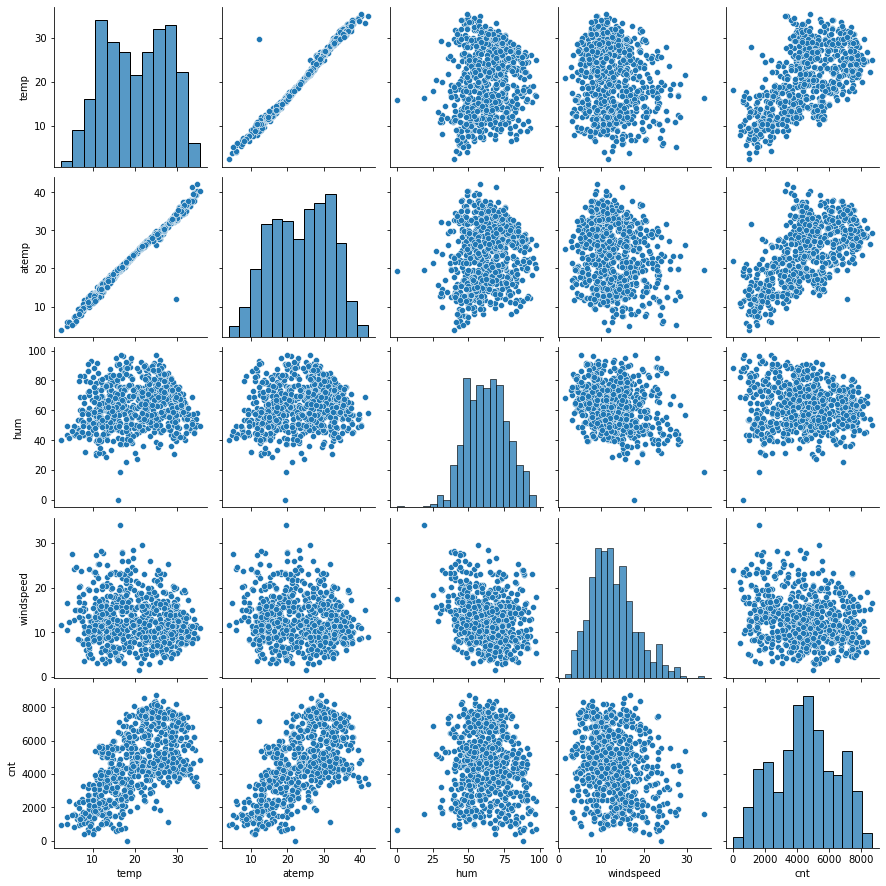

In [12]:
#Visualizing the numerical columns

sns.pairplot(data=bike_sharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

# By looking at above plots:
## temp and atemp has linear relatioship(straight line). We cannot use both column due to multicolinearity in the model, we will keep one column based on VIF an p-value at the time of training the model. 

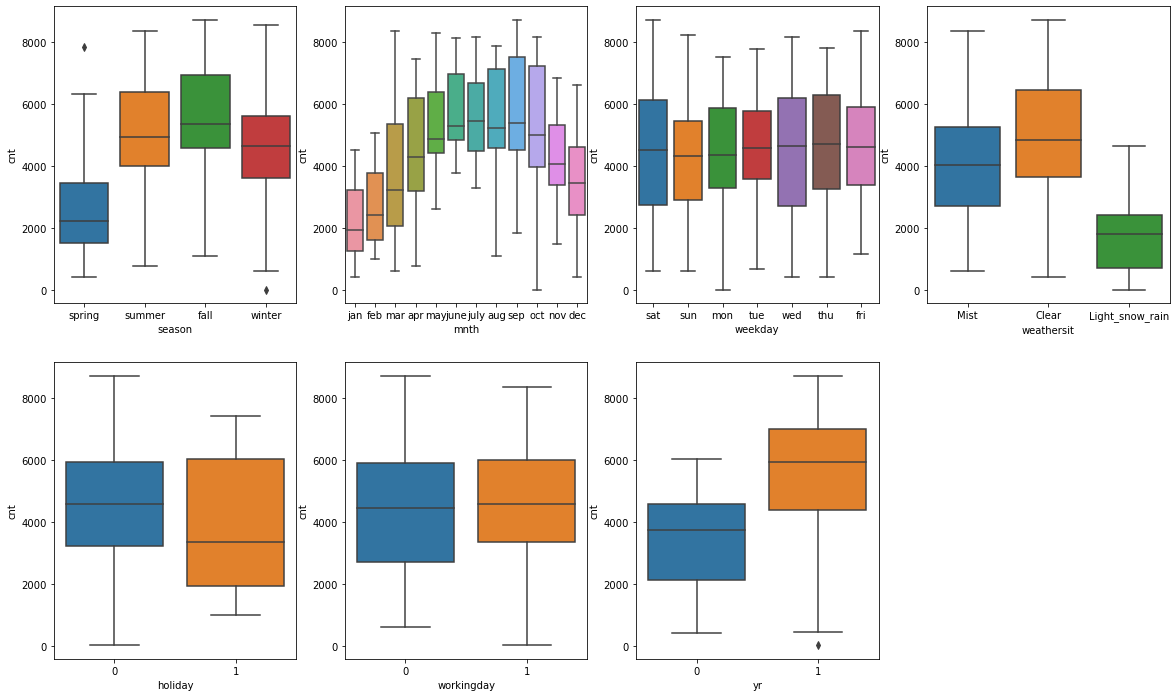

In [13]:
 # visualizing the categorical columns, to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.show()

# By looking at above plots:
    # More booking are done in fall season followed by summer, winter and spring
    # More booking are done in fall and summer months - May through sep (excluding july)
    # No drastically change whether its week day or weekend
    # More booking when weathersit is clear
    # No drastically change whether it working day or not
    # More booking in year 2019 compared to 2018   


In [14]:
# function for categorical columns:

def categorical_columns(columns):
    plt.figure(figsize = (12,8))
    plt.subplot(1,2,1)
    sns.barplot(columns,'cnt',data=bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(columns,'cnt',data=bike_sharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

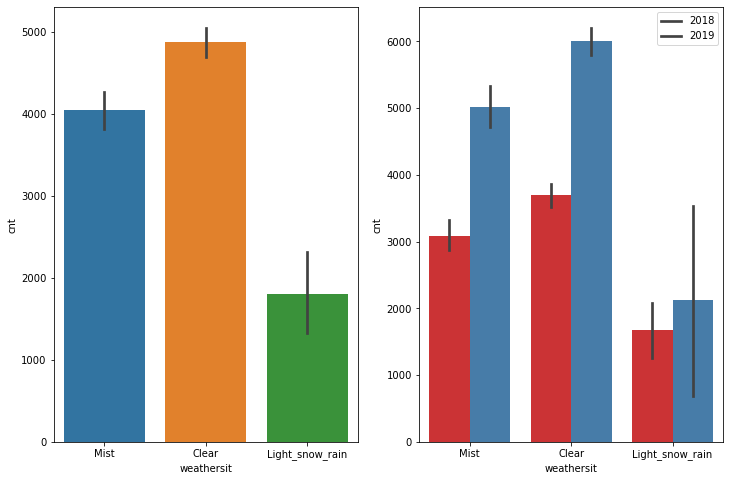

In [15]:
# plotting for weathersit column
categorical_columns('weathersit')

# By looking at above plots:
    ## More booking when weathersit is clear. 2019 booking are more than 2018

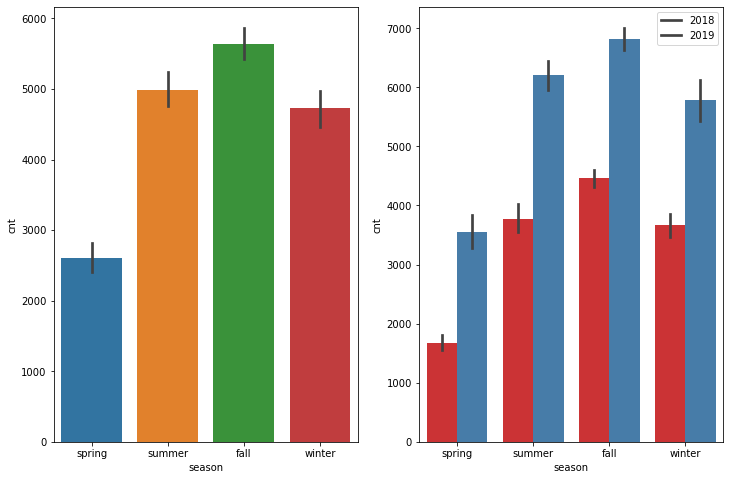

In [16]:
#plotting for season column
categorical_columns('season')

# By looking at above plots:
    ## More booking are done in fall season followed by summer, winter and spring
    ## More booking in year 2019 compared to 2018   

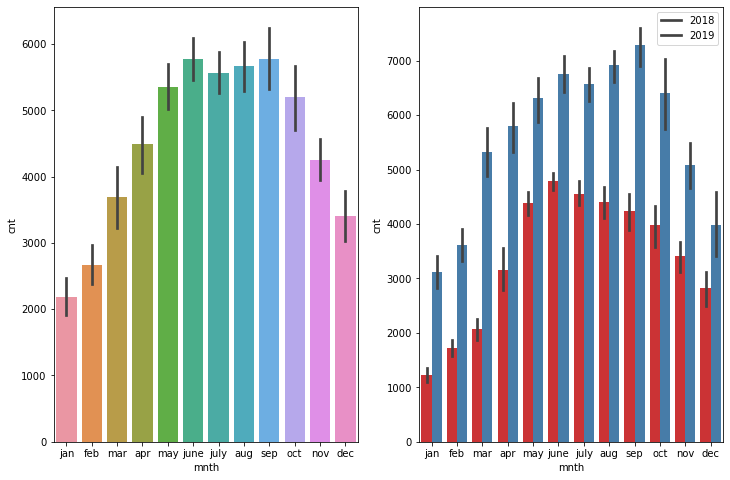

In [17]:
#plotting for season column
categorical_columns('mnth')

# By looking at above plots:
       ## More booking are done in fall and summer months - May through sep (excluding july) and it started decreasing at 
       the end of the year
       ## More booking in year 2019 compared to 2018 

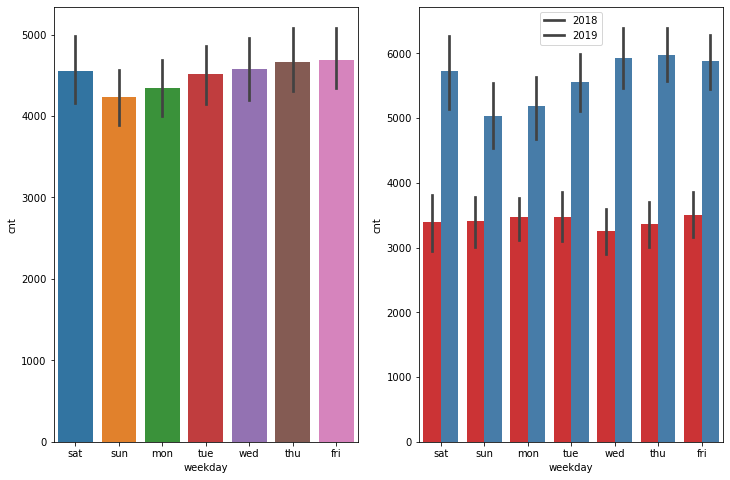

In [18]:
#plotting for weekday column
categorical_columns('weekday')

# By looking at above plots:
#No big change whether its week day or weekend

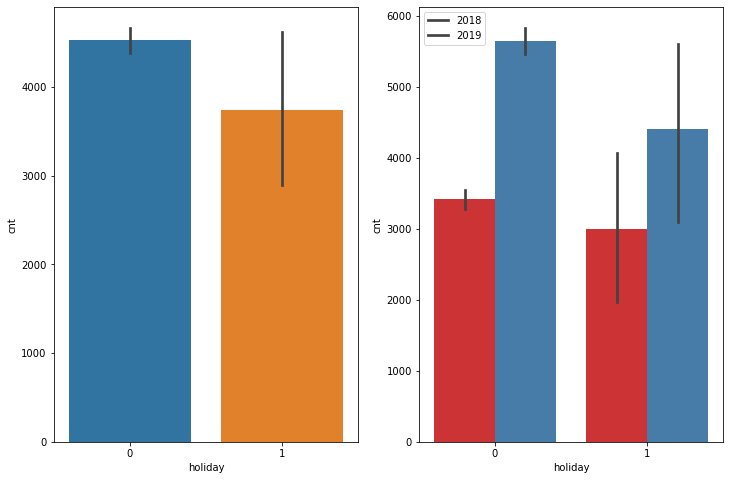

In [19]:
# plotting for holiday column

categorical_columns('holiday')

# By looking at above plots:
#No drastically change whether it working day or hoilday

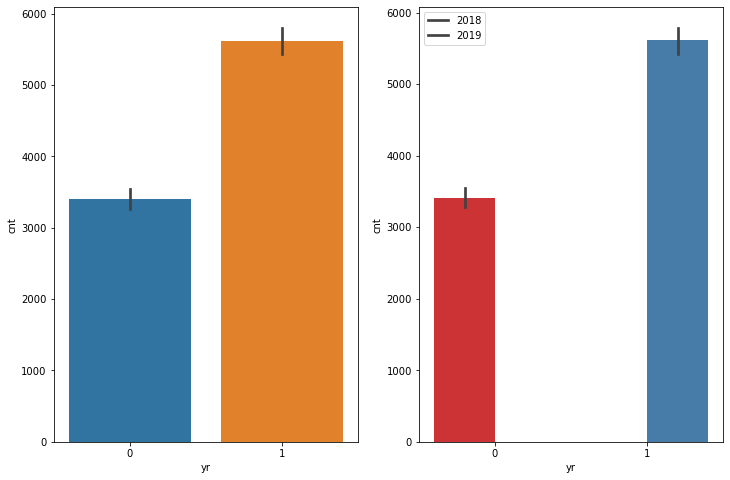

In [20]:
# plotting for year column

categorical_columns('yr')

# By looking at above plots:

#More booking in year 2019 compared to 2018  

In [21]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 3: Data Preparation

The variables `mnth`, `weekdays`, `weathersit`, `season` has more levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [22]:
bike_sharing_season = pd.get_dummies(bike_sharing['season'],drop_first = True)
bike_sharing_weathersit = pd.get_dummies(bike_sharing['weathersit'],drop_first = True)
bike_sharing_months = pd.get_dummies(bike_sharing['mnth'],drop_first = True)
bike_sharing_weekdays = pd.get_dummies(bike_sharing['weekday'],drop_first = True)

In [23]:
# Add the results to the original bike_sharing dataframe

bike_sharing = pd.concat([bike_sharing, bike_sharing_season,bike_sharing_weathersit,bike_sharing_months,bike_sharing_weekdays], axis = 1)

In [24]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [25]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  casual           730 non-null    int64  
 12  registered       730 non-null    int64  
 13  cnt              730 non-null    int64  
 14  spring           730 non-null    uint8  
 15  summer           730 non-null    uint8  
 16  winter           730 non-null    uint8  
 17  Light_snow_rain 

In [26]:
# casual and registered seems to be the breakup by category for cnt column.

bike_sharing.drop(['casual','registered'],axis=1,inplace=True)

In [27]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_sharing.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [28]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  Light_snow_rain  730 non-null    uint8  
 12  Mist             730 non-null    uint8  
 13  aug              730 non-null    uint8  
 14  dec              730 non-null    uint8  
 15  feb              730 non-null    uint8  
 16  jan              730 non-null    uint8  
 17  july            

# Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [29]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
df_train.shape

(510, 30)

In [31]:
df_test.shape

(219, 30)

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


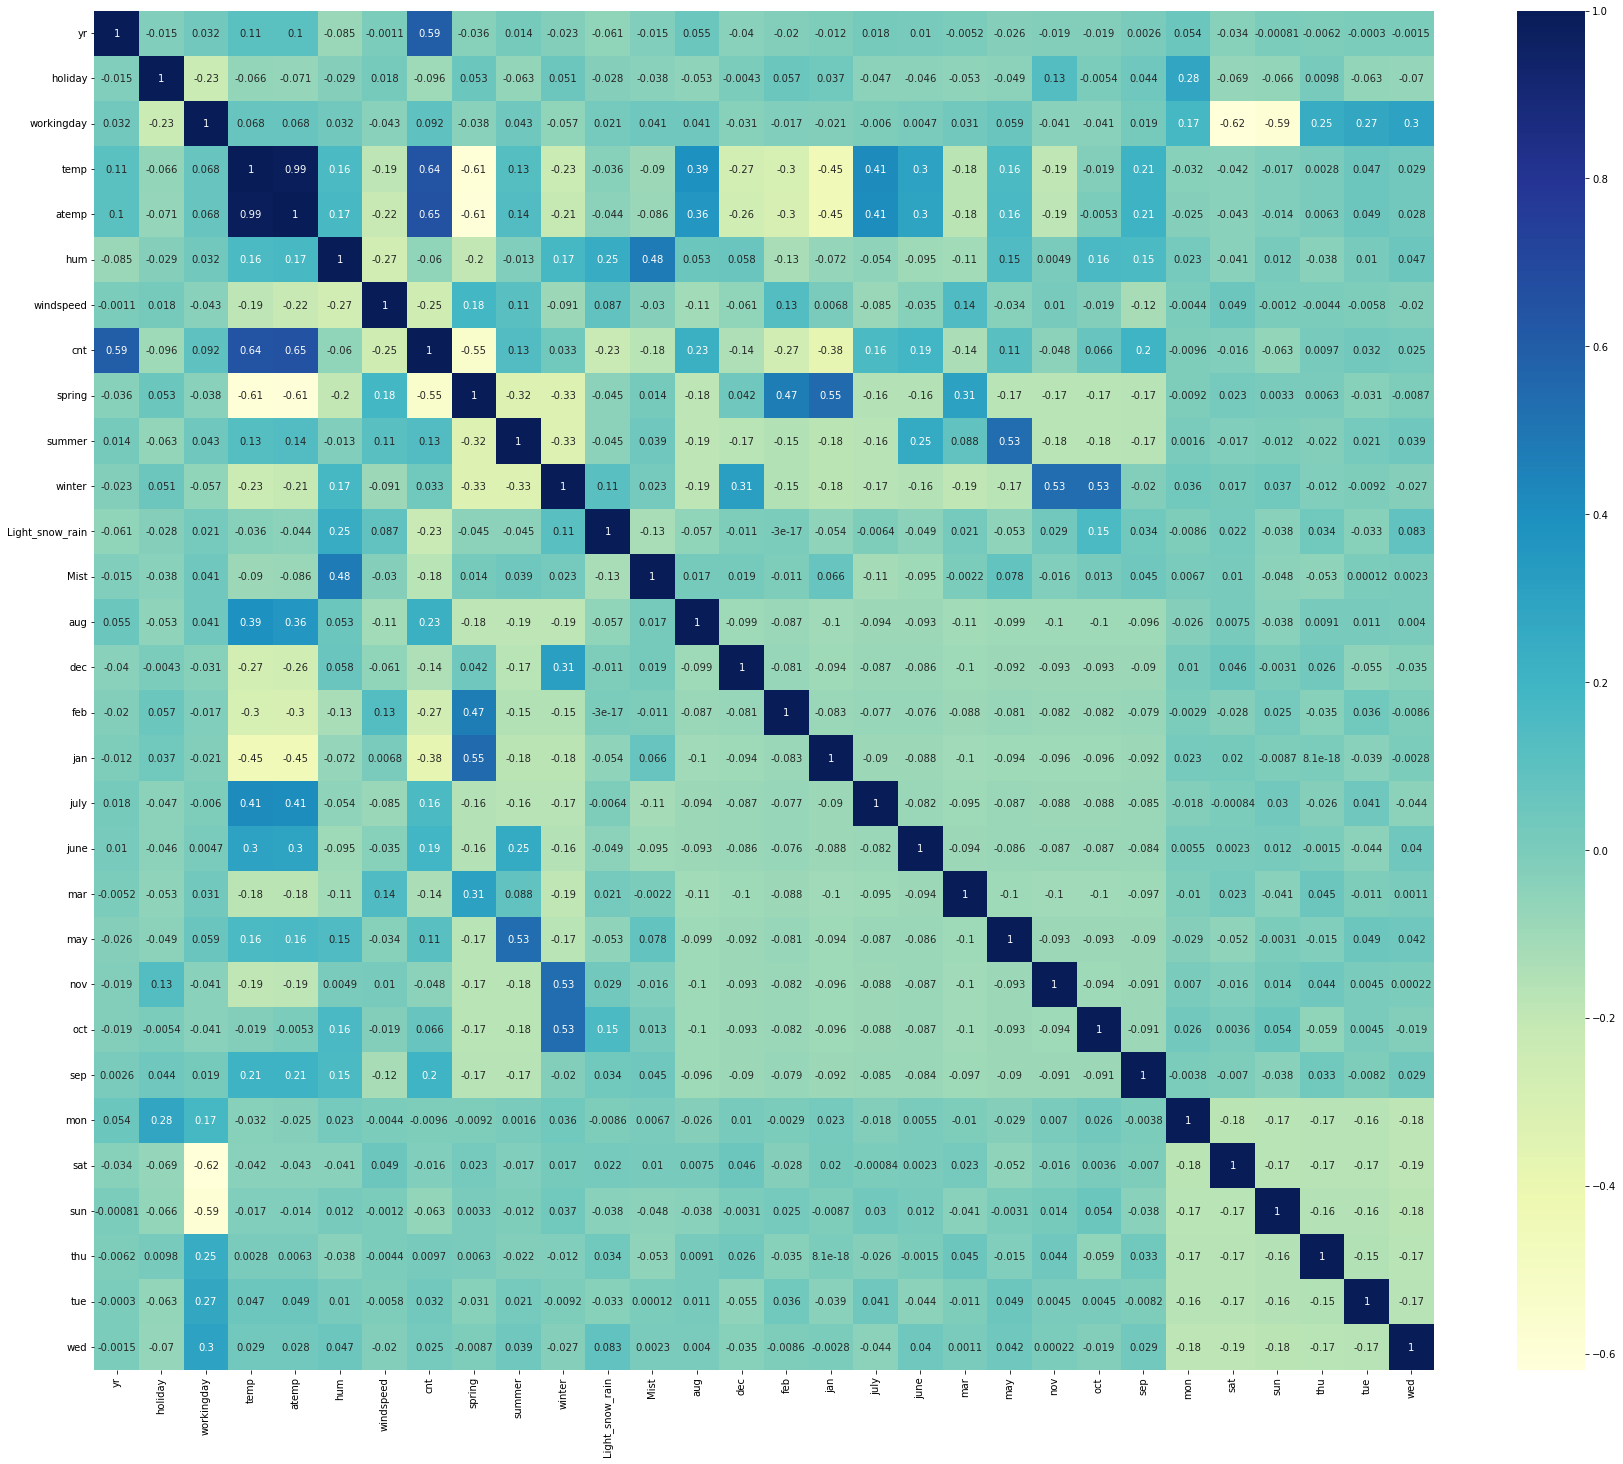

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# By looking at the heatmap

Looks cnt has correlation with year(0.64) and temp(0.59).

Spring with Jan (0.55) and feb(0.47) months show correlation.

Winter with Nov (0.53) and Oct(0.53) months show correleation


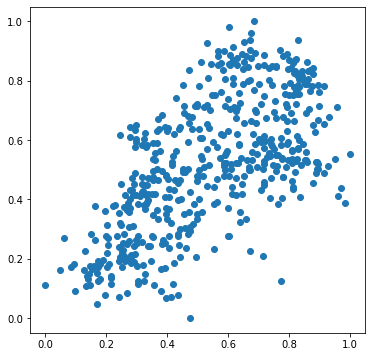

In [37]:
#Correlation with scatter plot btw temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [38]:
### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   spring           510 non-null    uint8  
 8   summer           510 non-null    uint8  
 9   winter           510 non-null    uint8  
 10  Light_snow_rain  510 non-null    uint8  
 11  Mist             510 non-null    uint8  
 12  aug              510 non-null    uint8  
 13  dec              510 non-null    uint8  
 14  feb              510 non-null    uint8  
 15  jan              510 non-null    uint8  
 16  july             510 non-null    uint8  
 17  june           

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [43]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
# selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light_snow_rain', True, 1),
 ('Mist', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Light_snow_rain', 'Mist', 'dec', 'jan', 'nov', 'sep'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'aug', 'feb', 'july', 'june', 'mar', 'may',
       'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.28e-185
Time:                        00:09:41   Log-Likelihood:                 502.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3748      0.032     

In [51]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

Rebuilding the model without `atemp`

In [52]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [53]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [54]:
#Let's see the summary of our linear model after dropping the atemp variable
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.80e-186
Time:                        00:09:41   Log-Likelihood:                 502.25
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3763      0.032     

#After dropping the atemp feature, didn't see increase in R-square (its same as earlier -0.838 )

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.88
3,temp,2.99
6,spring,2.73
7,winter,2.34
4,hum,1.88
12,nov,1.70
11,jan,1.62
9,Mist,1.56
10,dec,1.44
8,Light_snow_rain,1.25


In [56]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.57
2,temp,14.20
4,windspeed,4.03
6,winter,2.97
5,spring,2.93
8,Mist,2.26
0,yr,2.06
11,nov,1.82
10,jan,1.73
9,dec,1.53


In [58]:
#dropping humidity feature as the VIF is 23.57
X_train_new = X_train_new.drop(['hum'], axis=1)

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.99
2,temp,3.79
5,winter,2.50
4,spring,2.36
0,yr,2.06
10,nov,1.80
9,jan,1.64
7,Mist,1.51
8,dec,1.46
11,sep,1.17


In [60]:
# Building 2nd linear regression model

X_train_lm_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          6.19e-185
Time:                        00:09:41   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     497   BIC:                            -911.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3066      0.025     

In [61]:
#dropping nov feature as it has next high p-value and see if it makes difference in R-squareed
X_train_new = X_train_new.drop(['nov'], axis=1)

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.95
2,temp,3.77
4,spring,2.35
0,yr,2.06
9,jan,1.64
5,winter,1.61
7,Mist,1.51
8,dec,1.29
10,sep,1.16
6,Light_snow_rain,1.08


In [63]:
# Building 3rd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.89e-184
Time:                        00:09:41   Log-Likelihood:                 492.32
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2938      0.025     

In [64]:
#dropping dec feature as it has next high p-value and see if it makes difference in R-squareed
X_train_new = X_train_new.drop(['dec'], axis=1)

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.95
2,temp,3.76
4,spring,2.24
0,yr,2.06
8,jan,1.60
7,Mist,1.51
5,winter,1.37
9,sep,1.16
6,Light_snow_rain,1.08
1,holiday,1.04


In [66]:
# Building 4th linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.8
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.58e-184
Time:                        00:09:41   Log-Likelihood:                 489.65
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     499   BIC:                            -910.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2820      0.025     

In [67]:
#dropping jan feature as it has next high p-value and see if it makes difference in R-squareed
X_train_new = X_train_new.drop(['jan'], axis=1)

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,spring,1.65
7,Mist,1.50
5,winter,1.37
8,sep,1.16
6,Light_snow_rain,1.08
1,holiday,1.04


In [69]:
# Building 5th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.31e-184
Time:                        00:09:42   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2671      0.024     

### Above model looks significant as all features has p-value of "0", resonable R^2 of 0.827 and Prob (F-statistic):  3.31e-184 (which is close to zero "0")

In [70]:
# Look into parameters and their coefficient values
lr_4.params

const              0.267078
yr                 0.235355
holiday           -0.097018
temp               0.407826
windspeed         -0.135566
spring            -0.116181
winter             0.047958
Light_snow_rain   -0.288462
Mist              -0.078597
sep                0.069984
dtype: float64

In [71]:
X_train_lm_4

,const,yr,holiday,temp,windspeed,spring,winter,Light_snow_rain,Mist,sep
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0


In [72]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

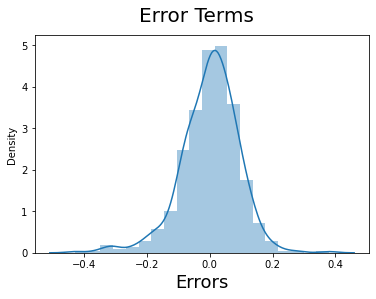

In [73]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

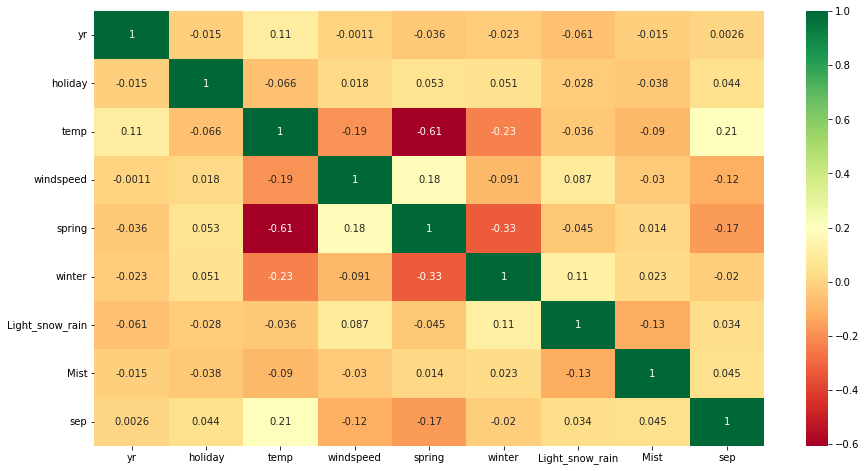

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [75]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [77]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [80]:
y_pred = lr_4.predict(X_test_lm_4)

In [81]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8041

## Please see above for R-squared score on the test data set

## Model Evaluation

Text(0, 0.5, 'y_pred')

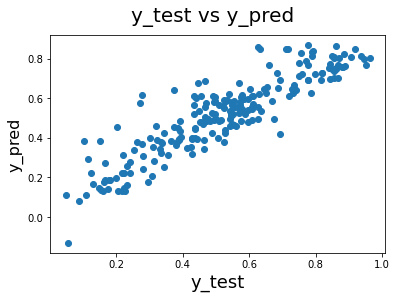

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

# Variables that are significant in predicting the demand for shared bikes are - yr, holiday, temp, windspeed, spring, winter, Light_snow_rain, Mist, sep

# Data Sets Train and Test values:

##### Train R^2 value - 0.8270
##### Test R^2 value -  0.8041
